<a href="https://colab.research.google.com/github/Sreelakshmi0208/Machine-Learning-Projects/blob/main/Pneumonia.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1.


In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
from keras.preprocessing.image import ImageDataGenerator
train=ImageDataGenerator(rescale=1./255,validation_split=0.2)
test=ImageDataGenerator(rescale=1./255)

In [ ]:
train_dataset=train.flow_from_directory("/content/gdrive/MyDrive/Pneumonia Dataset/train",target_size=(224,224),batch_size=32,class_mode='binary',subset="training")
valid_dataset=train.flow_from_directory("/content/gdrive/MyDrive/Pneumonia Dataset/train",target_size=(224,224),batch_size=32,class_mode='binary',subset="validation")
test_dataset=test.flow_from_directory("/content/gdrive/MyDrive/Pneumonia Dataset/test",target_size=(224,224),batch_size=32,class_mode='binary')

Found 120 images belonging to 2 classes.
Found 28 images belonging to 2 classes.
Found 40 images belonging to 2 classes.


In [ ]:
from keras.applications.vgg19 import VGG19
vgg_model=VGG19(include_top=False,weights='imagenet',input_shape=(224,224,3),classes=1,classifier_activation='sigmoid')

80150528/80134624 [==============================] - 0s 0us/step


In [ ]:
vgg_model.summary()

Model: "vgg19"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [ ]:
for layer in vgg_model.layers:
    layer.trainable = False

In [ ]:
import matplotlib.pyplot as plt
from keras.models import Model
#import tensorflow
from tensorflow.keras.optimizers import Adam
from keras.applications.vgg16 import VGG16, preprocess_input
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ModelCheckpoint, EarlyStopping
from keras.layers import Dense, Dropout, Flatten
x = Flatten()(vgg_model.output)
x=Dense(4096,activation='relu')(x)

In [ ]:
prediction=Dense(1, activation='sigmoid')(x)

In [ ]:
model = Model(inputs=vgg_model.input, outputs=prediction)
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [ ]:
model.compile(loss='binary_crossentropy',optimizer="adam",metrics=['accuracy'])

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping 
early_stop=EarlyStopping(monitor='val_loss',mode='min',verbose=1,patience=3)

In [ ]:
from keras.callbacks import ModelCheckpoint, EarlyStopping
checkpoint = ModelCheckpoint("vgg16_1.h5", monitor='val_acc', verbose=1, save_best_only=True, save_weights_only=False, mode='auto', period=1)

In [ ]:
# fit the model
history = model.fit(train_dataset,validation_data=valid_dataset,epochs=20,callbacks=[early_stop,checkpoint],batch_size=32,shuffle=True)

Epoch 1/20
4/4 [==============================] - ETA: 0s - loss: 19.2695 - accuracy: 0.5833

4/4 [==============================] - 50s 12s/step - loss: 19.2695 - accuracy: 0.5833 - val_loss: 18.6313 - val_accuracy: 0.5000
Epoch 2/20
4/4 [==============================] - ETA: 0s - loss: 14.8942 - accuracy: 0.5000

4/4 [==============================] - 5s 1s/step - loss: 14.8942 - accuracy: 0.5000 - val_loss: 0.0916 - val_accuracy: 0.9643
Epoch 3/20
4/4 [==============================] - ETA: 0s - loss: 3.5632 - accuracy: 0.6833

4/4 [==============================] - 5s 1s/step - loss: 3.5632 - accuracy: 0.6833 - val_loss: 4.1791 - val_accuracy: 0.6786
Epoch 4/20
4/4 [==============================] - ETA: 0s - loss: 1.7253 - accuracy: 0.8500

4/4 [==============================] - 5s 1s/step - loss: 1.7253 - accuracy: 0.8500 - val_loss: 0.9668 - val_accuracy: 0.8214
Epoch 5/20
4/4 [==============================] - ETA: 0s - loss: 1.3393 - accuracy: 0.8083

4/4 [==============================] - 5s 1s/step - loss: 1.3393 - accuracy: 0.8083 - val_loss: 2.7216 - val_accuracy: 0.7143
Epoch 5: early stopping


In [ ]:
model.evaluate(test_dataset)

2/2 [==============================] - 4s 3s/step - loss: 2.9933 - accuracy: 0.6750


[2.9933061599731445, 0.675000011920929]

In [ ]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
import numpy as np
#predict
y_pred=model.predict(test_dataset)
y_pred=(y_pred>0.5)

In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix(test_dataset.classes,y_pred)

array([[ 3, 17],
       [ 4, 16]])

In [ ]:
accuracy_score(test_dataset.classes,y_pred)

0.475

In [ ]:
import numpy as np
from tensorflow.keras.applications.inception_v3 import InceptionV3
from keras.layers import GlobalAveragePooling2D
base_model=InceptionV3(input_shape=(224,224,3),include_top=False,weights='imagenet')

87924736/87910968 [==============================] - 1s 0us/step


In [ ]:
base_model.summary()

In [ ]:
x=base_model.output
x=GlobalAveragePooling2D()(x)

for layer in base_model.layers:
  layer.trainable=False

In [ ]:
from keras.models import Model
from keras.layers import Flatten, Dense
x=Flatten()(x)
x=Dense(512,activation='relu')(x)
predictions=Dense(1,activation='sigmoid')(x)
model_final=Model(base_model.input,predictions)

In [ ]:
model_final.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [ ]:
history = model_final.fit(train_dataset,validation_data=valid_dataset,epochs=20,callbacks=[early_stop,checkpoint],batch_size=32,shuffle=True)

Epoch 1/20
4/4 [==============================] - ETA: 0s - loss: 1.6772 - accuracy: 0.5250

4/4 [==============================] - 13s 2s/step - loss: 1.6772 - accuracy: 0.5250 - val_loss: 2.2943 - val_accuracy: 0.5000
Epoch 2/20
4/4 [==============================] - ETA: 0s - loss: 0.6270 - accuracy: 0.7833

4/4 [==============================] - 5s 1s/step - loss: 0.6270 - accuracy: 0.7833 - val_loss: 0.8981 - val_accuracy: 0.7500
Epoch 3/20
4/4 [==============================] - ETA: 0s - loss: 0.3604 - accuracy: 0.8333

4/4 [==============================] - 5s 1s/step - loss: 0.3604 - accuracy: 0.8333 - val_loss: 0.7536 - val_accuracy: 0.6786
Epoch 4/20
4/4 [==============================] - ETA: 0s - loss: 0.3571 - accuracy: 0.8583

4/4 [==============================] - 5s 1s/step - loss: 0.3571 - accuracy: 0.8583 - val_loss: 0.6122 - val_accuracy: 0.6786
Epoch 5/20
4/4 [==============================] - ETA: 0s - loss: 0.1759 - accuracy: 0.9250

4/4 [==============================] - 5s 1s/step - loss: 0.1759 - accuracy: 0.9250 - val_loss: 0.3556 - val_accuracy: 0.8571
Epoch 6/20
4/4 [==============================] - ETA: 0s - loss: 0.1706 - accuracy: 0.9333

4/4 [==============================] - 5s 1s/step - loss: 0.1706 - accuracy: 0.9333 - val_loss: 0.3428 - val_accuracy: 0.8214
Epoch 7/20
4/4 [==============================] - ETA: 0s - loss: 0.1175 - accuracy: 0.9583

4/4 [==============================] - 5s 1s/step - loss: 0.1175 - accuracy: 0.9583 - val_loss: 0.3656 - val_accuracy: 0.8214
Epoch 8/20
4/4 [==============================] - ETA: 0s - loss: 0.0934 - accuracy: 0.9667

4/4 [==============================] - 5s 1s/step - loss: 0.0934 - accuracy: 0.9667 - val_loss: 0.2036 - val_accuracy: 0.9286
Epoch 9/20
4/4 [==============================] - ETA: 0s - loss: 0.0719 - accuracy: 0.9667

4/4 [==============================] - 5s 1s/step - loss: 0.0719 - accuracy: 0.9667 - val_loss: 0.2412 - val_accuracy: 0.8571
Epoch 10/20
4/4 [==============================] - ETA: 0s - loss: 0.0644 - accuracy: 0.9833

4/4 [==============================] - 5s 1s/step - loss: 0.0644 - accuracy: 0.9833 - val_loss: 0.3403 - val_accuracy: 0.8214
Epoch 11/20
4/4 [==============================] - ETA: 0s - loss: 0.0343 - accuracy: 0.9917

4/4 [==============================] - 5s 1s/step - loss: 0.0343 - accuracy: 0.9917 - val_loss: 0.2205 - val_accuracy: 0.8929
Epoch 11: early stopping


In [ ]:
model_final.evaluate(test_dataset)

2/2 [==============================] - 2s 976ms/step - loss: 0.1272 - accuracy: 0.9250


[0.12719443440437317, 0.925000011920929]

In [ ]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
import numpy as np
#predict
y_pred=model_final.predict(test_dataset)
y_pred=(y_pred>0.5)

In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix(test_dataset.classes,y_pred)

array([[12,  8],
       [ 7, 13]])

In [ ]:
accuracy_score(test_dataset.classes,y_pred)

0.625

In [ ]:
model_final.save("/content/drive/MyDrive/pneumonia2.h5")
print("Saved model to disk")
model_final.save_weights("/content/drive/MyDrive/pneumonia2.h5")

Saved model to disk


In [ ]:
from keras.models import Model
from keras.layers import Flatten, Dense, Reshape
x=base_model.output
x=GlobalAveragePooling2D()(x)

for layer in base_model.layers:
  layer.trainable=False

x=Flatten()(x)
x=Dense(512,activation='relu')(x)
x4 = Reshape(target_shape=(512, 1))(x)
predictions=Dense(1,activation='sigmoid')(x)
model_final=Model(base_model.input,predictions)

In [ ]:
model_final.summary()

In [ ]:
model_final.compile(loss='binary_crossentropy',optimizer="adam",metrics=['accuracy'])

In [ ]:
# fit the model
history = model_final.fit(train_dataset,validation_data=valid_dataset,epochs=20,callbacks=[early_stop,checkpoint],batch_size=32,shuffle=True)

Epoch 1/20
4/4 [==============================] - ETA: 0s - loss: 2.4907 - accuracy: 0.5667

4/4 [==============================] - 10s 2s/step - loss: 2.4907 - accuracy: 0.5667 - val_loss: 1.3861 - val_accuracy: 0.5000
Epoch 2/20
4/4 [==============================] - ETA: 0s - loss: 1.2890 - accuracy: 0.5417

4/4 [==============================] - 5s 1s/step - loss: 1.2890 - accuracy: 0.5417 - val_loss: 0.5115 - val_accuracy: 0.7857
Epoch 3/20
4/4 [==============================] - ETA: 0s - loss: 0.4946 - accuracy: 0.8000

4/4 [==============================] - 5s 1s/step - loss: 0.4946 - accuracy: 0.8000 - val_loss: 1.2224 - val_accuracy: 0.5357
Epoch 4/20
4/4 [==============================] - ETA: 0s - loss: 0.4295 - accuracy: 0.8167

4/4 [==============================] - 5s 1s/step - loss: 0.4295 - accuracy: 0.8167 - val_loss: 0.3879 - val_accuracy: 0.8571
Epoch 5/20
4/4 [==============================] - ETA: 0s - loss: 0.2978 - accuracy: 0.8583

4/4 [==============================] - 5s 1s/step - loss: 0.2978 - accuracy: 0.8583 - val_loss: 0.4235 - val_accuracy: 0.8214
Epoch 6/20
4/4 [==============================] - ETA: 0s - loss: 0.2413 - accuracy: 0.8917

4/4 [==============================] - 5s 1s/step - loss: 0.2413 - accuracy: 0.8917 - val_loss: 0.3592 - val_accuracy: 0.8214
Epoch 7/20
4/4 [==============================] - ETA: 0s - loss: 0.1866 - accuracy: 0.9000

4/4 [==============================] - 5s 1s/step - loss: 0.1866 - accuracy: 0.9000 - val_loss: 0.3900 - val_accuracy: 0.7857
Epoch 8/20
4/4 [==============================] - ETA: 0s - loss: 0.1476 - accuracy: 0.9417

4/4 [==============================] - 5s 1s/step - loss: 0.1476 - accuracy: 0.9417 - val_loss: 0.2441 - val_accuracy: 0.8929
Epoch 9/20
4/4 [==============================] - ETA: 0s - loss: 0.1364 - accuracy: 0.9500

4/4 [==============================] - 5s 1s/step - loss: 0.1364 - accuracy: 0.9500 - val_loss: 0.2292 - val_accuracy: 0.9643
Epoch 10/20
4/4 [==============================] - ETA: 0s - loss: 0.1223 - accuracy: 0.9500

4/4 [==============================] - 5s 1s/step - loss: 0.1223 - accuracy: 0.9500 - val_loss: 0.2368 - val_accuracy: 0.8929
Epoch 11/20
4/4 [==============================] - ETA: 0s - loss: 0.1086 - accuracy: 0.9667

4/4 [==============================] - 5s 1s/step - loss: 0.1086 - accuracy: 0.9667 - val_loss: 0.3162 - val_accuracy: 0.8214
Epoch 12/20
4/4 [==============================] - ETA: 0s - loss: 0.0893 - accuracy: 0.9833

4/4 [==============================] - 5s 1s/step - loss: 0.0893 - accuracy: 0.9833 - val_loss: 0.2200 - val_accuracy: 0.8929
Epoch 13/20
4/4 [==============================] - ETA: 0s - loss: 0.0811 - accuracy: 0.9833

4/4 [==============================] - 5s 1s/step - loss: 0.0811 - accuracy: 0.9833 - val_loss: 0.2023 - val_accuracy: 0.9286
Epoch 14/20
4/4 [==============================] - ETA: 0s - loss: 0.0732 - accuracy: 0.9833

4/4 [==============================] - 5s 1s/step - loss: 0.0732 - accuracy: 0.9833 - val_loss: 0.2236 - val_accuracy: 0.8929
Epoch 15/20
4/4 [==============================] - ETA: 0s - loss: 0.0595 - accuracy: 0.9917

4/4 [==============================] - 5s 1s/step - loss: 0.0595 - accuracy: 0.9917 - val_loss: 0.2325 - val_accuracy: 0.8929
Epoch 16/20
4/4 [==============================] - ETA: 0s - loss: 0.0531 - accuracy: 1.0000

4/4 [==============================] - 5s 1s/step - loss: 0.0531 - accuracy: 1.0000 - val_loss: 0.2127 - val_accuracy: 0.8929
Epoch 16: early stopping


In [ ]:
model_final.evaluate(test_dataset)

2/2 [==============================] - 1s 150ms/step - loss: 0.1395 - accuracy: 0.9250


[0.13946221768856049, 0.925000011920929]

In [ ]:
#predict
y_pred=model_final.predict(test_dataset)
y_pred=(y_pred>0.5)

In [ ]:
confusion_matrix(test_dataset.classes,y_pred)

array([[10, 10],
       [ 9, 11]])

In [ ]:
accuracy_score(test_dataset.classes,y_pred)

0.525

2.

In [ ]:
!pip install --upgrade pandas-datareader==0.9.0

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!pip install -q yfinance

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [ ]:
from pandas_datareader import DataReader
import yfinance as yf
from datetime import datetime

In [ ]:
tech_list=['AAPL','MSFT']   


In [ ]:
end=datetime.now()
start=datetime(end.year -10 ,end.month,end.day)

In [ ]:
start

datetime.datetime(2012, 9, 14, 0, 0)

In [ ]:
end

datetime.datetime(2022, 9, 14, 20, 20, 24, 902988)

In [ ]:
for stock in tech_list:
  globals()[stock]=yf.download(stock,start,end)

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [ ]:
company_list=[AAPL,MSFT]#symbol present in yfinance
company_name=["Apple","Microsoft"]#Actual company name
ma_days=[10,20,50]
for ma in ma_days:
  for company in company_list:
    column_name=f'MA FOR {ma} DAYS'
    company[column_name]=company['Close'].rolling(ma).mean()

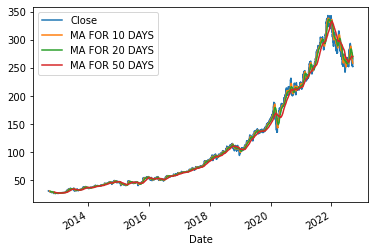

In [ ]:
MSFT[['Close','MA FOR 10 DAYS','MA FOR 20 DAYS','MA FOR 50 DAYS']].plot()

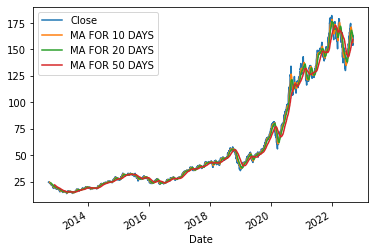

In [ ]:
AAPL[['Close','MA FOR 10 DAYS','MA FOR 20 DAYS','MA FOR 50 DAYS']].plot()

In [ ]:
AAPL.head()

,Open,High,Low,Close,Adj Close,Volume,MA FOR 10 DAYS,MA FOR 20 DAYS,MA FOR 50 DAYS
Date,,,,,,,,,
2012-09-14,24.641430,24.892143,24.567499,24.688572,21.170391,600474000,NaN,NaN,NaN
2012-09-17,24.976786,24.992857,24.807501,24.992144,21.430712,398031200,NaN,NaN,NaN
2012-09-18,24.995714,25.083214,24.872143,25.068214,21.495939,373503200,NaN,NaN,NaN
2012-09-19,25.009287,25.142500,24.984644,25.075001,21.501759,326874800,NaN,NaN,NaN
2012-09-20,24.969999,25.002144,24.772142,24.953571,21.397635,336568400,NaN,NaN,NaN


In [ ]:
MSFT.head()

,Open,High,Low,Close,Adj Close,Volume,MA FOR 10 DAYS,MA FOR 20 DAYS,MA FOR 50 DAYS
Date,,,,,,,,,
2012-09-14,31.010000,31.250000,30.809999,31.209999,25.597084,51422800,NaN,NaN,NaN
2012-09-17,31.190001,31.260000,31.040001,31.209999,25.597084,36488500,NaN,NaN,NaN
2012-09-18,31.100000,31.209999,31.030001,31.180000,25.572481,34542700,NaN,NaN,NaN
2012-09-19,31.090000,31.190001,31.040001,31.049999,25.465862,48871900,NaN,NaN,NaN
2012-09-20,30.950001,31.480000,30.910000,31.450001,25.793930,45543000,NaN,NaN,NaN


In [ ]:
apple_data=AAPL.filter(['Close'])
apple_data.head()

,Close
Date,
2012-09-14,24.688572
2012-09-17,24.992144
2012-09-18,25.068214
2012-09-19,25.075001
2012-09-20,24.953571


In [ ]:
dataset=apple_data.values

In [ ]:
dataset

array([[ 24.68857193],
       [ 24.99214363],
       [ 25.06821442],
       ...,
       [163.42999268],
       [153.83999634],
       [155.30999756]])

In [ ]:
training_data_len=int(np.ceil(len(dataset)*.85))

In [ ]:
dataset.shape

(2516, 1)

In [ ]:
training_data_len

2139

In [ ]:
from sklearn.preprocessing import MinMaxScaler


In [ ]:
scaler=MinMaxScaler(feature_range=(0,1))
scaled_data=scaler.fit_transform(dataset)

In [ ]:
scaled_data[:5]

array([[0.06391118],
       [0.06571748],
       [0.06617011],
       [0.06621049],
       [0.06548797]])

In [ ]:
train_data=scaled_data[0:int(training_data_len),:]

In [ ]:
x_train=[]
y_train=[]
for i in range(60,len(train_data)):
  x_train.append(train_data[i-60:i,0])
  y_train.append(train_data[i,0])

In [ ]:
print(x_train[:5])

[array([0.06391118, 0.06571748, 0.06617011, 0.06621049, 0.06548797,
       0.06578335, 0.06380704, 0.06014132, 0.05836477, 0.06179461,
       0.05877278, 0.05713436, 0.05754237, 0.05969717, 0.05870902,
       0.05568932, 0.05262498, 0.05213197, 0.05320725, 0.05048504,
       0.05082718, 0.05190034, 0.0550943 , 0.05399352, 0.05144982,
       0.04660469, 0.05174521, 0.04735271, 0.0480901 , 0.04654093,
       0.04536365, 0.0435191 , 0.04377836, 0.03958349, 0.04124529,
       0.04086914, 0.03558838, 0.03128513, 0.03326356, 0.03236466,
       0.03237954, 0.03110025, 0.02870743, 0.0291452 , 0.03723105,
       0.03620676, 0.03637465, 0.0384572 , 0.04228869, 0.04127929,
       0.04088828, 0.04225256, 0.04138554, 0.04157891, 0.0393816 ,
       0.03150614, 0.03330182, 0.03032886, 0.02959996, 0.03205865]), array([0.06571748, 0.06617011, 0.06621049, 0.06548797, 0.06578335,
       0.06380704, 0.06014132, 0.05836477, 0.06179461, 0.05877278,
       0.05713436, 0.05754237, 0.05969717, 0.05870902, 0.05

In [ ]:
x_train,y_train=np.array(x_train),np.array(y_train)

In [ ]:
x_train.shape

(2079, 60)

In [ ]:
x_train=np.reshape(x_train,(x_train.shape[0],x_train.shape[1],1))

In [ ]:
x_train.shape

(2079, 60, 1)

In [ ]:
#build the model
from keras.models import Sequential
from keras.layers import Dense, LSTM, Bidirectional
model=Sequential()
model.add(Bidirectional(LSTM(128,return_sequences=True,input_shape=(x_train.shape[1],1))))
model.add(Bidirectional(LSTM(64,return_sequences=True)))
model.add(Bidirectional(LSTM(16,return_sequences=False)))
model.add(Dense(25))
model.add(Dense(1))

In [ ]:
#model.summary()

In [ ]:
from keras.callbacks import EarlyStopping
earlystop=EarlyStopping(monitor='loss',min_delta=0,patience=3,verbose=1,
                        restore_best_weights=True)

In [ ]:
model.compile(optimizer='adam',loss='mean_squared_error')


In [ ]:
model.fit(x_train,y_train,batch_size=2,callbacks=[earlystop],epochs=50)

Epoch 1/50
1040/1040 [==============================] - 28s 18ms/step - loss: 8.8290e-04
Epoch 2/50
1040/1040 [==============================] - 19s 19ms/step - loss: 3.6059e-04
Epoch 3/50
1040/1040 [==============================] - 19s 19ms/step - loss: 2.8422e-04
Epoch 4/50
1040/1040 [==============================] - 19s 18ms/step - loss: 3.0592e-04
Epoch 5/50
1040/1040 [==============================] - 19s 18ms/step - loss: 2.6885e-04
Epoch 6/50
1040/1040 [==============================] - 19s 18ms/step - loss: 1.9947e-04
Epoch 7/50
1040/1040 [==============================] - 19s 18ms/step - loss: 1.9204e-04
Epoch 8/50
1040/1040 [==============================] - 19s 18ms/step - loss: 1.8445e-04
Epoch 9/50
1040/1040 [==============================] - 19s 18ms/step - loss: 1.9794e-04
Epoch 10/50
1040/1040 [==============================] - 19s 18ms/step - loss: 1.8498e-04
Epoch 11/50
1040/1040 [==============================] - 19s 18ms/step - loss: 1.2807e-04
Epoch 12/50
1040/10

In [ ]:
test_data=scaled_data[training_data_len-60:,:]

In [ ]:
test_data.shape

(437, 1)

In [ ]:
x_test=[]
y_test=dataset[training_data_len:,:]

for i in range(60,len(test_data)):
  x_test.append(test_data[i-60:i,0])


In [ ]:
type(x_test)

list

In [ ]:
x_test=np.array(x_test)

In [ ]:
x_test=np.reshape(x_test,(x_test.shape[0],x_test.shape[1],1))

In [ ]:
predictions=model.predict(x_test)

In [ ]:
predictions=scaler.inverse_transform(predictions)

In [ ]:
y_test.shape

(377, 1)

In [ ]:
rmse=np.sqrt(np.mean(((predictions-y_test)**2)))

In [ ]:
rmse

5.94562231845341

In [ ]:
train=apple_data[:training_data_len]
valid=apple_data[training_data_len:]
valid['prediction']=predictions

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


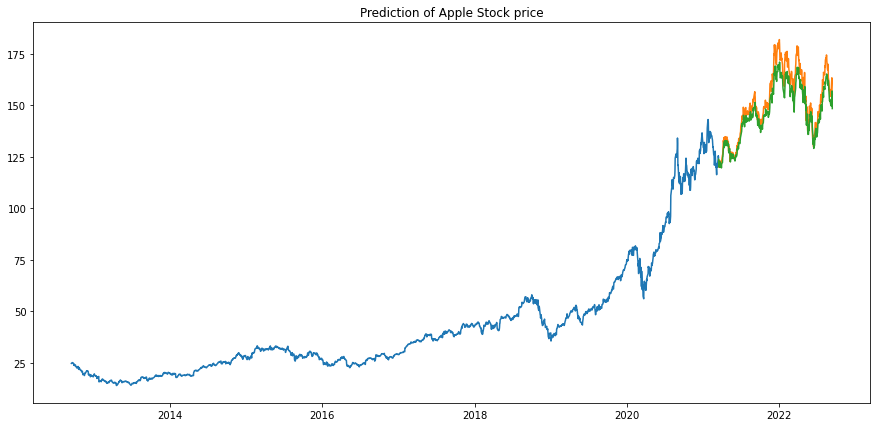

In [ ]:
plt.figure(figsize=(15,7))
plt.plot(train['Close'])
plt.plot(valid[['Close','prediction']])
plt.title("Prediction of Apple Stock price")
plt.show()

In [ ]:
microsoft_data=MSFT.filter(['Close'])
microsoft_data.head()

,Close
Date,
2012-09-14,31.209999
2012-09-17,31.209999
2012-09-18,31.180000
2012-09-19,31.049999
2012-09-20,31.450001


In [ ]:
dataset=microsoft_data.values

In [ ]:
dataset

array([[ 31.20999908],
       [ 31.20999908],
       [ 31.18000031],
       ...,
       [266.6499939 ],
       [251.99000549],
       [252.22000122]])

In [ ]:
training_data_len=int(np.ceil(len(dataset)*.85))

In [ ]:
dataset.shape

(2516, 1)

In [ ]:
training_data_len

2139

In [ ]:
from sklearn.preprocessing import MinMaxScaler


In [ ]:
scaler=MinMaxScaler(feature_range=(0,1))
scaled_data=scaler.fit_transform(dataset)

In [ ]:
scaled_data[:5]

array([[0.01528067],
       [0.01528067],
       [0.01518596],
       [0.01477552],
       [0.01603839]])

In [ ]:
train_data=scaled_data[0:int(training_data_len),:]

In [ ]:
x_train=[]
y_train=[]
for i in range(60,len(train_data)):
  x_train.append(train_data[i-60:i,0])
  y_train.append(train_data[i,0])

In [ ]:
print(x_train[:5])

[array([0.01528067, 0.01528067, 0.01518596, 0.01477552, 0.01603839,
       0.01521753, 0.01392309, 0.01269179, 0.01199722, 0.01196565,
       0.01070278, 0.00985035, 0.01038707, 0.0110185 , 0.01155522,
       0.01098693, 0.01076593, 0.00918735, 0.00824019, 0.00814548,
       0.00893477, 0.00991349, 0.00985035, 0.01016607, 0.00988192,
       0.00716676, 0.00514617, 0.00530403, 0.00483046, 0.00476731,
       0.00580918, 0.00685105, 0.00994506, 0.00988192, 0.01029235,
       0.0110185 , 0.00855591, 0.00770348, 0.00776662, 0.00584075,
       0.00227316, 0.00148386, 0.00091557, 0.00047357, 0.00113657,
       0.00107343, 0.00183115, 0.00419903, 0.0032203 , 0.00224158,
       0.00312559, 0.00183115, 0.00078929, 0.00018943, 0.        ,
       0.00094715, 0.00113657, 0.00028414, 0.00179958, 0.0029993 ]), array([0.01528067, 0.01518596, 0.01477552, 0.01603839, 0.01521753,
       0.01392309, 0.01269179, 0.01199722, 0.01196565, 0.01070278,
       0.00985035, 0.01038707, 0.0110185 , 0.01155522, 0.01

In [ ]:
x_train,y_train=np.array(x_train),np.array(y_train)

In [ ]:
x_train.shape

(2079, 60)

In [ ]:
x_train=np.reshape(x_train,(x_train.shape[0],x_train.shape[1],1))

In [ ]:
x_train.shape

(2079, 60, 1)

In [ ]:
#build the model
from keras.models import Sequential
from keras.layers import Dense, LSTM, Bidirectional
model=Sequential()
model.add(Bidirectional(LSTM(128,return_sequences=True,input_shape=(x_train.shape[1],1))))
model.add(Bidirectional(LSTM(64,return_sequences=True)))
model.add(Bidirectional(LSTM(16,return_sequences=False)))
model.add(Dense(25))
model.add(Dense(1))

In [ ]:
#model.summary()

In [ ]:
from keras.callbacks import EarlyStopping
earlystop=EarlyStopping(monitor='loss',min_delta=0,patience=3,verbose=1,
                        restore_best_weights=True)

In [ ]:
model.compile(optimizer='adam',loss='mean_squared_error')


In [ ]:
model.fit(x_train,y_train,batch_size=2,callbacks=[earlystop],epochs=50)

Epoch 1/50
1040/1040 [==============================] - 28s 18ms/step - loss: 8.2923e-04
Epoch 2/50
1040/1040 [==============================] - 24s 23ms/step - loss: 3.2830e-04
Epoch 3/50
1040/1040 [==============================] - 22s 21ms/step - loss: 3.4208e-04
Epoch 4/50
1040/1040 [==============================] - 24s 23ms/step - loss: 1.9535e-04
Epoch 5/50
1040/1040 [==============================] - 19s 19ms/step - loss: 2.5104e-04
Epoch 6/50
1040/1040 [==============================] - 19s 18ms/step - loss: 1.5833e-04
Epoch 7/50
1040/1040 [==============================] - 20s 19ms/step - loss: 2.3169e-04
Epoch 8/50
1040/1040 [==============================] - 19s 18ms/step - loss: 1.6947e-04
Epoch 9/50
1040/1040 [==============================] - 19s 18ms/step - loss: 1.4269e-04
Epoch 10/50
1040/1040 [==============================] - 19s 18ms/step - loss: 1.5985e-04
Epoch 11/50
1040/1040 [==============================] - 20s 19ms/step - loss: 1.1502e-04
Epoch 12/50
1040/10

In [ ]:
test_data=scaled_data[training_data_len-60:,:]

In [ ]:
test_data.shape

(437, 1)

In [ ]:
x_test=[]
y_test=dataset[training_data_len:,:]

for i in range(60,len(test_data)):
  x_test.append(test_data[i-60:i,0])


In [ ]:
type(x_test)

list

In [ ]:
x_test=np.array(x_test)

In [ ]:
x_test=np.reshape(x_test,(x_test.shape[0],x_test.shape[1],1))

In [ ]:
predictions=model.predict(x_test)

In [ ]:
predictions=scaler.inverse_transform(predictions)

In [ ]:
y_test.shape

(377, 1)

In [ ]:
rmse=np.sqrt(np.mean(((predictions-y_test)**2)))

In [ ]:
rmse

7.269240178276667

In [ ]:
train=microsoft_data[:training_data_len]
valid=microsoft_data[training_data_len:]
valid['prediction']=predictions

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


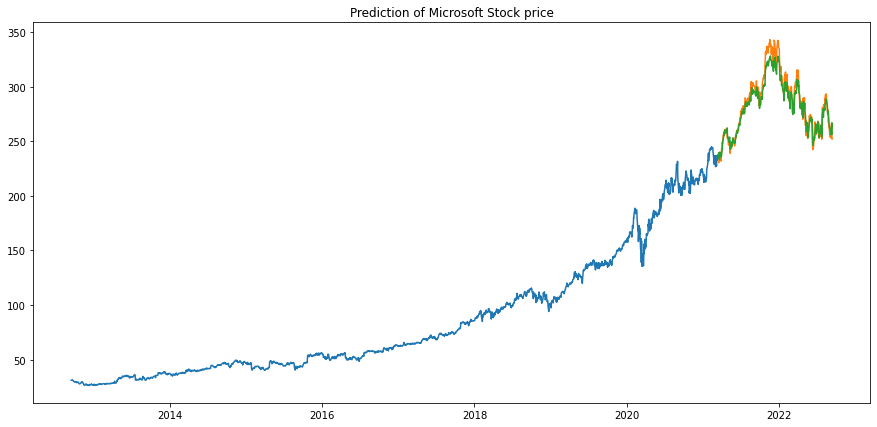

In [ ]:
plt.figure(figsize=(15,7))
plt.plot(train['Close'])
plt.plot(valid[['Close','prediction']])
plt.title("Prediction of Microsoft Stock price")
plt.show()

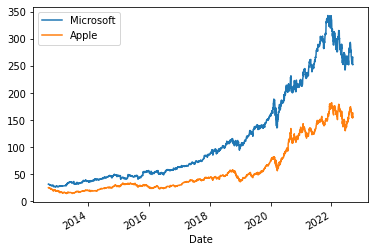

In [ ]:
MSFT["Close"].plot()
AAPL["Close"].plot()
plt.legend(["Microsoft","Apple"])

Question 3

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from keras.models import Sequential, Model
from keras.layers import Dense, Conv2D, Flatten, MaxPooling2D, UpSampling2D, Input
from keras.preprocessing import image
from math import log10,sqrt
from tqdm import tqdm #progress bar

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
test_path = "/content/drive/MyDrive/Butterfly Dataset/test"
train_path = "/content/drive/MyDrive/Butterfly Dataset/train"

In [ ]:
import os
train=[]
for filename in os.listdir(train_path):
  #print(filename)
  if filename.endswith(".jpg"):
    img=image.load_img(train_path+"/"+filename,target_size=(128,128))
    img = image.img_to_array(img)
    train.append(img)
train =np.array(train)

test=[]
for filename in os.listdir(test_path):
  #print(filename)
  if filename.endswith(".jpg"):
    img=image.load_img(test_path+"/"+filename,target_size=(128,128))
    img = image.img_to_array(img)
    test.append(img)
test =np.array(test)

In [ ]:
import numpy
import matplotlib.pyplot as plt
from keras.models import Sequential, Model,Input
from keras.layers import Dense,Conv2D, MaxPooling2D,Conv2DTranspose
from keras.datasets import mnist

In [ ]:
x_train = train.astype('float32')/255
x_test = test.astype('float32')/255

In [ ]:
x_train.shape

(40, 128, 128, 3)

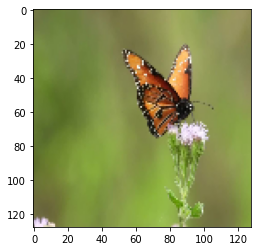

In [ ]:
#plt.subplot(221)
plt.imshow(x_train[4])
plt.show()

In [ ]:
num_pixels=x_train.shape[1]*x_train.shape[2]
num_pixels

16384

In [ ]:
x_train.shape

(40, 128, 128, 3)

In [ ]:
x_train=x_train.reshape(len(x_train),num_pixels,3)

In [ ]:
x_train.shape

(40, 16384, 3)

In [ ]:
x_test.shape

(20, 128, 128, 3)

In [ ]:
x_test=x_test.reshape(len(x_test),num_pixels,3)

In [ ]:
x_test.shape

(20, 16384, 3)

In [ ]:
import numpy as np
noise_factor=0.2
x_train_noisy=x_train+noise_factor*np.random.normal(loc=0.0,scale=1.0,size=x_train.shape)
x_test_noisy=x_test+noise_factor*np.random.normal(loc=0.0,scale=1.0,size=x_test.shape)


In [ ]:
x_train_noisy=numpy.clip(x_train_noisy,0.,1.)
x_test_noisy=numpy.clip(x_test_noisy,0.,1.)


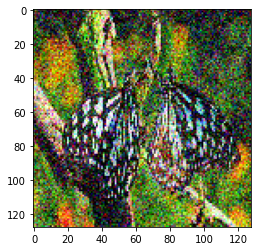

In [ ]:
plt.imshow(x_train_noisy[1].reshape(128,128,3))
plt.show()

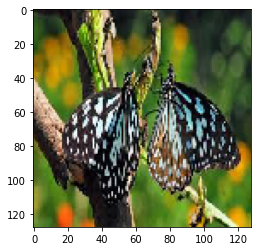

In [ ]:
plt.imshow(x_train[1].reshape(128,128,3))
plt.show()

In [ ]:
#create the model
model=Sequential()
model.add(Dense(600,input_shape=(num_pixels,3),activation='relu'))
model.add(Dense(500,activation='relu'))

model.add(Dense(100,activation='relu'))#code layer
#decoder

model.add(Dense(500,activation='relu'))
model.add(Dense(600,activation='relu'))
model.add(Dense(3,activation='sigmoid'))

model.summary()

Model: "sequential_24"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_187 (Dense)           (None, 16384, 600)        2400      
                                                                 
 dense_188 (Dense)           (None, 16384, 500)        300500    
                                                                 
 dense_189 (Dense)           (None, 16384, 100)        50100     
                                                                 
 dense_190 (Dense)           (None, 16384, 500)        50500     
                                                                 
 dense_191 (Dense)           (None, 16384, 600)        300600    
                                                                 
 dense_192 (Dense)           (None, 16384, 3)          1803      
                                                                 
Total params: 705,903
Trainable params: 705,903
Non-t

In [ ]:
import keras
input_img = keras.Input(shape=(num_pixels,3))
encoded = Dense(128,activation='relu')(input_img)
encoded = Dense(64,activation="relu")(encoded)
encoded = Dense(32,activation="relu")(encoded)

decoded = Dense(64,activation="relu")(encoded)
decoded = Dense(128,activation="relu")(decoded)
decoded = Dense(3,activation="sigmoid")(decoded)

model = Model(input_img,decoded)

model.summary()

Model: "model_35"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_14 (InputLayer)       [(None, 16384, 3)]        0         
                                                                 
 dense_193 (Dense)           (None, 16384, 128)        512       
                                                                 
 dense_194 (Dense)           (None, 16384, 64)         8256      
                                                                 
 dense_195 (Dense)           (None, 16384, 32)         2080      
                                                                 
 dense_196 (Dense)           (None, 16384, 64)         2112      
                                                                 
 dense_197 (Dense)           (None, 16384, 128)        8320      
                                                                 
 dense_198 (Dense)           (None, 16384, 3)          387

In [ ]:
model.compile(optimizer='adam',loss='mean_squared_error')
model.fit(x_train_noisy,x_train_noisy,epochs=100,batch_size=300,validation_data=(x_test_noisy,x_test_noisy))

Epoch 1/100
1/1 [==============================] - 1s 1s/step - loss: 0.1134 - val_loss: 0.1103
Epoch 2/100
1/1 [==============================] - 0s 178ms/step - loss: 0.1123 - val_loss: 0.1096
Epoch 3/100
1/1 [==============================] - 0s 132ms/step - loss: 0.1114 - val_loss: 0.1089
Epoch 4/100
1/1 [==============================] - 0s 127ms/step - loss: 0.1105 - val_loss: 0.1081
Epoch 5/100
1/1 [==============================] - 0s 128ms/step - loss: 0.1096 - val_loss: 0.1073
Epoch 6/100
1/1 [==============================] - 0s 129ms/step - loss: 0.1087 - val_loss: 0.1065
Epoch 7/100
1/1 [==============================] - 0s 166ms/step - loss: 0.1078 - val_loss: 0.1056
Epoch 8/100
1/1 [==============================] - 0s 129ms/step - loss: 0.1068 - val_loss: 0.1046
Epoch 9/100
1/1 [==============================] - 0s 130ms/step - loss: 0.1056 - val_loss: 0.1035
Epoch 10/100
1/1 [==============================] - 0s 141ms/step - loss: 0.1044 - val_loss: 0.1023
Epoch 11/100

KeyboardInterrupt: ignored

In [ ]:
output=model.predict(x_test_noisy)

In [ ]:
plt.imshow(x_test_noisy[1].reshape(128,128,3))
plt.show()

In [ ]:
plt.imshow(output[1].reshape(128,128,3))
plt.show()

Denoising-(Convolutional Auto encoder):

In [ ]:
x_train_noisy.shape

In [ ]:
x_train_noisy=x_train_noisy.reshape(len(x_train_noisy),128,128,3)

In [ ]:
x_train_noisy.shape


In [ ]:
x_test_noisy.shape

In [ ]:
x_test_noisy=x_test_noisy.reshape(len(x_test_noisy),128,128,3)

In [ ]:
x_test_noisy.shape

In [ ]:
input=Input(shape=(128,128,3))
#Encoder
x=Conv2D(64,(3,3),activation='relu',padding='same')(input)
x=MaxPooling2D((2,2),padding='same')(x)
x=Conv2D(32,(3,3),activation='relu',padding='same')(x)
x=MaxPooling2D((2,2),padding='same')(x)
#Decoder
x=Conv2DTranspose(32,(3,3),strides=2,activation='relu',padding='same')(x)

x=Conv2DTranspose(64,(3,3),strides=2,activation='relu',padding='same')(x)
x=Conv2D(3,(3,3),activation='sigmoid',padding='same')(x)
autoencoder_denoise=Model(input,x)

In [ ]:
autoencoder_denoise.summary()

In [ ]:
autoencoder_denoise.compile(optimizer='adam',loss='binary_crossentropy')

In [ ]:
autoencoder_denoise.fit(x_train_noisy,x_train_noisy,epochs=200,batch_size=128,shuffle=True,validation_data=(x_test_noisy,x_test_noisy))

In [ ]:
output=autoencoder_denoise.predict(x_test_noisy)

In [ ]:
plt.imshow(x_test_noisy[1].reshape(128,128,3))

In [ ]:
plt.imshow(output[1].reshape(128,128,3))

In [ ]:
plt.imshow(x_test[1].reshape(128,128,3))

In [ ]:
def PSNR(noised,denoised):
  mse=np.mean((noised-denoised)**2)
  if (mse==0):
    return 100
  max_pizel=255.0
  psnr=20*log10(max_pizel/sqrt(mse))
  return psnr

In [ ]:
loss_dict = {"adam":0.0,"rmsprop":0.0,"adadelta":0.0}

In [ ]:
def train_model1(input_layer,output_layer,optimizer,epochs,batch_size):
  model=Model(input_layer,output_layer) 
  model.compile(optimizer=optimizer,loss="binary_crossentropy",metrics=["mean_squared_error"])
  print("with",optimizer,"epochs",epochs)
  model.fit(x_train_noisy,x_train_noisy,epochs=epochs,batch_size=batch_size,validation_data=(x_test_noisy,x_test_noisy),verbose=0)
  decoded_images=model.predict(x_test_noisy)
  n=10
  
  plt.figure(figsize=(20,8))
  for i in range(1,n+1):
    plt.suptitle("Noised",fontsize=20)
    ax=plt.subplot(2,n,i)
    plt.imshow(x_test_noisy[i].reshape(128,128,3))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
  plt.show()
  plt.figure(figsize=(20,8))
  for i in range(1,n+1):
    ax=plt.subplot(2,n,i)
    plt.suptitle("Denoised",fontsize=20)
    plt.imshow(decoded_images[i].reshape(128,128,3))
    plt.gray()
    plt.title(f"PSNR:{round(PSNR(x_test_noisy[i],decoded_images[i]),2)}")
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
  plt.show()

In [ ]:
def train_model2(input_layer,output_layer,optimizer,epochs,batch_size):
  autoencoder_denoise=Model(input_layer,output_layer) 
  autoencoder_denoise.compile(optimizer=optimizer,loss="binary_crossentropy",metrics=["mean_squared_error"])
  print("with",optimizer,"epochs",epochs)
  autoencoder_denoise.fit(x_train_noisy,x_train_noisy,epochs=epochs,batch_size=batch_size,validation_data=(x_test_noisy,x_test_noisy),verbose=0)
  decoded_images=autoencoder_denoise.predict(x_test_noisy)
  n=10
  
  plt.figure(figsize=(20,8))
  for i in range(1,n+1):
    plt.suptitle("Noised",fontsize=20)
    ax=plt.subplot(2,n,i)
    plt.imshow(x_test_noisy[i].reshape(128,128,3))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
  plt.show()
  plt.figure(figsize=(20,8))
  for i in range(1,n+1):
    plt.suptitle("Denoised",fontsize=20)
    ax=plt.subplot(2,n,i)
    plt.imshow(decoded_images[i].reshape(128,128,3))
    plt.gray()
    plt.title(f"PSNR:{round(PSNR(x_test_noisy[i],decoded_images[i]),2)}")
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
  plt.show()

In [ ]:
x_train = train.astype('float32')/255
x_test = test.astype('float32')/255

In [ ]:
x_train=x_train.reshape(len(x_train),num_pixels,3)

In [ ]:
x_test=x_test.reshape(len(x_test),num_pixels,3)

In [ ]:
noise_factor=0.2
x_train_noisy=x_train+noise_factor*np.random.normal(loc=0.0,scale=1.0,size=x_train.shape)
x_test_noisy=x_test+noise_factor*np.random.normal(loc=0.0,scale=1.0,size=x_test.shape)


In [ ]:
x_train_noisy=numpy.clip(x_train_noisy,0.,1.)
x_test_noisy=numpy.clip(x_test_noisy,0.,1.)


In [ ]:
for i in tqdm(["adam","rmsprop","adadelta"]):
    train_model1(input_img,decoded,i,100,128)

In [ ]:
x_train_noisy=x_train_noisy.reshape(len(x_train_noisy),128,128,3)

In [ ]:
x_test_noisy=x_test_noisy.reshape(len(x_test_noisy),128,128,3)

In [ ]:
for i in tqdm(["adam","rmsprop","adadelta"]):
    train_model2(input,x,i,100,128)